# Capítulo 13: Estudo de caso: seleção de estrutura de dados

## Exercício 13.1

Escreva um programa que leia um arquivo, quebre cada linha em palavras, remova os espaços em branco e a pontuação das palavras, e as converta em letras minúsculas.

Dica: O módulo string oferece uma `string` chamada `whitespace`, que contém espaço, tab, newline etc., e `punctuation`, que contém os caracteres de pontuação. Vamos ver se conseguimos fazer o Python falar palavrões:

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
string.whitespace

' \t\n\r\x0b\x0c'

In [10]:
def read_file(filename):
    d = dict()
    for line in open(filename):
        word = line.strip().lower()
        d[word] = word

    return d

In [11]:
if __name__ == '__main__':
    word_dict = read_file('words.txt')

## Exercício 13.2

Acesse o Projeto Gutenberg (http://gutenberg.org) e baixe seu livro favorito em domínio público em formato de texto simples.

Altere seu programa do exercício anterior para ler o livro que você baixou, pulando as informações do cabeçalho no início do arquivo e processando o resto das palavras como antes.

Então altere o programa para contar o número total de palavras no livro e o número de vezes que cada palavra é usada.

Exiba o número de palavras diferentes usadas no livro. Compare livros diferentes de autores diferentes, escritos em eras diferentes. Que autor usa o vocabulário mais extenso?

In [12]:
def read_file(filename, start_line=1):
    """
    Lê o arquivo a partir da linha `start_line` (1-indexed), remove espaços e pontuação,
    converte as palavras para minúsculas e retorna um dicionário de palavras únicas.
    """
    d = dict()
    with open(filename, encoding='utf-8') as f:
        for lineno, line in enumerate(f, start=1):
            if lineno < start_line:
                continue
            for raw in line.split():
                word = raw.strip(string.whitespace + string.punctuation).lower()
                if word not in d:
                    d[word] = 1
                else:
                    val = d[word]
                    d[word] = val + 1

    return d

In [13]:
def print_most_used_words(word_dict):
    t = []
    for word, key in word_dict.items():
        t.append((key, word))
    t.sort(reverse=True)

    # print the most used 5 words
    print('As 5 palavras mais usadas: ')
    for key, word in t[0:5]:
        print(word, '', key)

In [14]:
def total_words(word_dict, print = 0):
  return sum(word_dict.values())

In [15]:
def total_different_words(word_dict):
  print('Número de palavras:')
  t_words = total_words(word_dict)
  print(t_words)
  print('Número de palavras diferentes:')
  diff_words = len(word_dict)
  print(diff_words)
  percent_words = diff_words / t_words
  print('Porcentagem de palavras diferentes:')
  print(percent_words)


In [16]:
# teste com texto lorem ipsum
if __name__ == '__main__':
    word_dict = read_file('livros/livro-teste.txt', start_line=23)
    print_most_used_words(word_dict)
    total_different_words(word_dict)

As 5 palavras mais usadas: 
sit  16
amet  16
ut  13
at  13
id  11
Número de palavras:
599
Número de palavras diferentes:
165
Porcentagem de palavras diferentes:
0.27545909849749584


In [17]:
if __name__ == '__main__':
    print('Frankenstein - Mary Shelley')
    word_dict = read_file('livros/frankeinstein-shelly.txt', start_line=66)
    print_most_used_words(word_dict)
    total_different_words(word_dict)

    print('\nO Grande Gatsby - F. Scott Fitzgerald')
    word_dict = read_file('livros/gatsby-fitzgerald.txt', start_line=45)
    print_most_used_words(word_dict)
    total_different_words(word_dict)

    print('\nMoby Dick - Herman Melville')
    word_dict = read_file('livros/moby-dick-melville.txt', start_line=314)
    print_most_used_words(word_dict)
    total_different_words(word_dict)

    print('\nOrgulho e Preconceito - Jane Austen')
    word_dict = read_file('livros/pride-austen.txt', start_line=90)
    print_most_used_words(word_dict)
    total_different_words(word_dict)

    print('\nRomeu e Julieta - William Shakespeare')
    word_dict = read_file('livros/romeo-shakespeare.txt', start_line=66)
    print_most_used_words(word_dict)
    total_different_words(word_dict)

Frankenstein - Mary Shelley
As 5 palavras mais usadas: 
the  4330
and  3022
i  2766
of  2754
to  2168
Número de palavras:
77883
Número de palavras diferentes:
7958
Porcentagem de palavras diferentes:
0.10217890938972561

O Grande Gatsby - F. Scott Fitzgerald
As 5 palavras mais usadas: 
the  2558
and  1590
a  1449
of  1225
to  1199
Número de palavras:
51095
Número de palavras diferentes:
7503
Porcentagem de palavras diferentes:
0.1468441139054702

Moby Dick - Herman Melville
As 5 palavras mais usadas: 
the  14425
of  6695
and  6388
a  4660
to  4652
Número de palavras:
215026
Número de palavras diferentes:
22047
Porcentagem de palavras diferentes:
0.1025317868536828

Orgulho e Preconceito - Jane Austen
As 5 palavras mais usadas: 
the  4796
to  4346
of  3938
and  3682
her  2251
Número de palavras:
130184
Número de palavras diferentes:
9010
Porcentagem de palavras diferentes:
0.06920973391507405

Romeu e Julieta - William Shakespeare
As 5 palavras mais usadas: 
the  861
and  797
to  621
i 

## Exercício 13.3

Altere o programa do exercício anterior para exibir as 20 palavras mais frequentes do livro.

In [18]:
def print_most_used_words(word_dict):
    t = []
    for word, key in word_dict.items():
        t.append((key, word))
    t.sort(reverse=True)

    # print the most used 20 words
    print('As 20 palavras mais usadas: ')
    for key, word in t[0:20]:
        print(word, '', key)

In [19]:
if __name__ == '__main__':
    print('Frankenstein - Mary Shelley')
    word_dict = read_file('livros/frankeinstein-shelly.txt', start_line=66)
    print_most_used_words(word_dict)

    print('\nO Grande Gatsby - F. Scott Fitzgerald')
    word_dict = read_file('livros/gatsby-fitzgerald.txt', start_line=45)
    print_most_used_words(word_dict)

    print('\nMoby Dick - Herman Melville')
    word_dict = read_file('livros/moby-dick-melville.txt', start_line=314)
    print_most_used_words(word_dict)

    print('\nOrgulho e Preconceito - Jane Austen')
    word_dict = read_file('livros/pride-austen.txt', start_line=90)
    print_most_used_words(word_dict)

    print('\nRomeu e Julieta - William Shakespeare')
    word_dict = read_file('livros/romeo-shakespeare.txt', start_line=66)
    print_most_used_words(word_dict)

Frankenstein - Mary Shelley
As 20 palavras mais usadas: 
the  4330
and  3022
i  2766
of  2754
to  2168
my  1751
a  1439
in  1181
was  1022
that  1019
me  853
with  711
had  686
but  680
you  613
he  599
which  565
it  541
not  534
his  533

O Grande Gatsby - F. Scott Fitzgerald
As 20 palavras mais usadas: 
the  2558
and  1590
a  1449
of  1225
to  1199
i  1174
in  856
he  794
was  764
that  580
it  498
his  489
you  488
with  462
at  414
her  381
had  379
she  371
on  361
for  333

Moby Dick - Herman Melville
As 20 palavras mais usadas: 
the  14425
of  6695
and  6388
a  4660
to  4652
in  4177
that  2918
his  2514
it  2321
i  1845
with  1762
but  1741
as  1725
is  1717
he  1716
was  1637
for  1613
all  1467
this  1394
at  1318

Orgulho e Preconceito - Jane Austen
As 20 palavras mais usadas: 
the  4796
to  4346
of  3938
and  3682
her  2251
a  2062
in  2015
was  1868
i  1796
she  1721
that  1572
not  1504
it  1477
he  1326
his  1290
you  1286
be  1271
as  1224
had  1182
with  1133

Romeu e

## Exercício 13.4

Altere o programa anterior para ler uma lista de palavras (ver “Leitura de listas de palavras”, na página 133) e então exiba todas as palavras do livro que não estão na lista de palavras. Quantas delas são erros ortográficos? Quantas delas são palavras comuns que deveriam estar na lista de palavras, e quantas são muito obscuras?

In [20]:
def read_file(filename, start_line=1):
    """
    Lê o arquivo a partir da linha `start_line` (1-indexed), remove espaços e pontuação,
    converte as palavras para minúsculas e retorna um dicionário de palavras únicas.
    """
    d = dict()
    with open(filename, encoding='utf-8') as f:
        for lineno, line in enumerate(f, start=1):
            if lineno < start_line:
                continue
            for raw in line.split():
                word = raw.strip(string.whitespace + string.punctuation).lower()
                if word not in d:
                    d[word] = 1
                else:
                    val = d[word]
                    d[word] = val + 1

    return d

In [21]:
def list_words(word_dict):
  """
  criar uma lista com as palavras do livro
  """
  l = []
  for key in word_dict.keys():
    l.append(key)
  
  return l

In [22]:
def word_search(word_dict, word_list):
  """
  procura itens da lista no dicionario
  """  
  count = 0
  print('Palavras nao encontradas no dicionario:')
  for word in word_list:
    if word not in word_dict:
      print(word)
      count = count + 1
  
  print('Total de palavras que não estão no dicionario:')
  print(count)

In [23]:
if __name__ == '__main__':
    print('Dicionario - palavras em ingles')
    word_dict = read_file('words.txt')

    print('\nO Grande Gatsby - F. Scott Fitzgerald')
    book_word_dict = read_file('livros/gatsby-fitzgerald.txt', start_line=45)
    book_word_list = list_words(book_word_dict)
    word_search(word_dict, book_word_list)

Dicionario - palavras em ingles

O Grande Gatsby - F. Scott Fitzgerald
Palavras nao encontradas no dicionario:
zelda
gold-hatted
high-bouncing
i
you!”
thomas
parke
d'invilliers
i've
anyone,”
haven't
you've
had.”
didn't
we've
unusually
a
i'm
unsought—frequently
plagiaristic
don't
it's
gatsby
reaction—gatsby
impressionability
temperament”—it
no—gatsby
short-winded

well-to-do
carraways
we're
buccleuch
grandfather's
fifty-one
great-uncle
him—with
hard-boiled
father's
1915
teutonic
migration
counter-raid
universe—so
why—ye-es,”
twenty-two
weather-beaten
dog—at
away—and
finnish
village?”
neighbourhood
breath-giving
midas
morgan
maecenas
college—one
yale
news—and
well-rounded
man.”
isn't
epigram—life
america
york—and
ovals—like
columbus
end—but
the—well
standard—it
hôtel
ville
normandy
gatsby's
mr
neighbour's
proximity
millionaires—all
buchanans
i'd
chicago
haven—a
twenty-one
wealthy—even
reproach—but
he'd
france
unrestfully
it—i
daisy's
red-and-white
georgian
gardens—finally
buchanan
straw-

In [24]:
if __name__ == '__main__':
    print('Dicionario - palavras em ingles')
    word_dict = read_file('words.txt')

    print('\nRomeu e Julieta - William Shakespeare')
    book_word_dict = read_file('livros/romeo-shakespeare.txt', start_line=66)
    book_word_list = list_words(book_word_dict)
    word_search(word_dict, book_word_list)

Dicionario - palavras em ingles

Romeu e Julieta - William Shakespeare
Palavras nao encontradas no dicionario:
iv
capulet's
v
juliet's
juliet
i
a
ii
lawrence's
iii
capulets
dramatis
personæ
escalus
verona
mercutio
romeo
montague
veronese
benvolio
abram
balthasar
capulet
montagues
tybalt
sampson
gregory
lawrence
franciscan
star-cross'd
misadventur'd
death-mark'd
children's
we'll
o
runn'st
montague's
maidenheads
master's
neighbour-stained
steel,—
mistemper'd
disturb'd
verona's
canker'd
free-town
judgement-place
exeunt
prepar'd
breath'd
hiss'd
worshipp'd
peer'd
rooteth
pursu'd
shunn'd
morning's
all-cheering
aurora's
portentous
importun'd
himself—i
true—
i'll
let's
romeo's
tyrannous
here's
well-seeming
still-waking
heart's
love's
purg'd
vex'd
nourish'd
he's
urg'd
aim'd
suppos'd
lov'd
markman
she's
she'll
cupid's
dian's
arm'd
uncharm'd
th'encounter
saint-seducing
starv'd
rul'd
pass'd
honourable
liv'd
o'er
marr'd
accustom'd
earth-treading
apparell'd
april
another's
lessen'd
whipp'd
and—god-d

Solução do autor (originally in python 2, this is not working yer, needd some more changes):

In [25]:
import string
import random

In [26]:
def skip_gutenberg_header(fp):
    """Reads from fp until it finds the line that ends the header.

    fp: open file object
    """
    for line in fp:
        if line.startswith('*END*THE SMALL PRINT!'):
            break

In [27]:
def process_line(line, hist):
    """Adds the words in the line to the histogram.

    Modifies hist.

    line: string
    hist: histogram (map from word to frequency)
    """
    # replace hyphens with spaces before splitting
    line = line.replace('-', ' ')
    
    for word in line.split():
        # remove punctuation and convert to lowercase
        word = word.strip(string.punctuation + string.whitespace)
        word = word.lower()

        # update the histogram
        hist[word] = hist.get(word, 0) + 1


In [38]:
def process_file(filename, skip_header):
    """Makes a histogram that contains the words from a file.

    filename: string
    skip_header: boolean, whether to skip the Gutenberg header
   
    Returns: map from each word to the number of times it appears.
    """
    hist = {}
    with open(filename, encoding='utf-8') as fp:
        if skip_header:
            skip_gutenberg_header(fp)

        for line in fp:
            process_line(line, hist)
    return hist

In [29]:
def most_common(hist):
    """Makes a list of the key-value pairs from a histogram and
    sorts them in descending order by frequency."""
    t = []
    for key, value in hist.items():
        t.append((value, key))

    t.sort()
    t.reverse()
    return t

In [31]:
def print_most_common(hist, num=10):
    """Prints the most commons words in a histgram and their frequencies.
    
    hist: histogram (map from word to frequency
    num: number of words to print
    """
    t = most_common(hist)
    print('The most common words are:')
    for freq, word in t[:num]:
        print(word, '\t', freq)

In [32]:
def subtract(d1, d2):
    """Returns a dictionary with all keys that appear in d1 but not d2.

    d1, d2: dictionaries
    """
    res = {}
    for key in d1:
        if key not in d2:
            res[key] = None
    return res

In [33]:
def total_words(hist):
    """Returns the total of the frequencies in a histogram."""
    return sum(hist.values())

In [34]:
def different_words(hist):
    """Returns the number of different words in a histogram."""
    return len(hist)

In [35]:
def random_word(hist):
    """Chooses a random word from a histogram.

    The probability of each word is proportional to its frequency.
    """
    t = []
    for word, freq in hist.items():
        t.extend([word] * freq)

    return random.choice(t)

In [41]:
if __name__ == '__main__':
    hist = process_file('livros/gatsby-fitzgerald.txt', skip_header=True)
    print('Total number of words:', total_words(hist))
    print('Number of different words:', different_words(hist))

    t = most_common(hist)
    print('The most common words are:')
    for freq, word in t[0:20]:
        print(word, '\t', freq)

    words = process_file('words.txt', skip_header=False)

    diff = subtract(hist, words)
    print("The words in the book that aren't in the word list are:")
    for word in diff.keys():
        print(word, end=' ')
    print()  # newline after listing words

    print("\n\nHere are some random words from the book")
    for i in range(100):
        #print(random_word(hist), end=' ')
        pass
    print()


Total number of words: 0
Number of different words: 0
The most common words are:
The words in the book that aren't in the word list are:



Here are some random words from the book



## Números aleatórios

Com as mesmas entradas, a maior parte dos programas gera as mesmas saídas a cada vez, então eles são chamados de **deterministas**. 

Fazer um programa não determinista de verdade é difícil; mas há formas de, pelo menos, fazê-los parecer que não são. Uma delas é usar algoritmos que geram números **pseudoaleatórios**. Os números *pseudoaleatórios não são aleatórios mesmo porque são gerados por um cálculo determinista*, mas é quase impossível distingui-los dos aleatórios só olhando para os números.

O módulo random fornece funções que geram números pseudoaleatórios (que chamarei apenas de “aleatórios” daqui em diante).

In [1]:
import random
for i in range(10):
    x = random.random()
    print(x)

0.4069935076112422
0.6632324441921593
0.9425486534368016
0.9505340115817407
0.40005974001056854
0.05418015940484222
0.016662090520612183
0.9240892339419045
0.447789996272569
0.7789720392109749


In [2]:
# A função randint recebe os parâmetros low e high e retorna um número inteiro entre low e high (inclusive ambos):
random.randint(5, 10)

9

In [3]:
# Para escolher aleatoriamente um elemento de uma sequência, você pode usar choice:
t = [1, 2, 3]
random.choice(t)

2

## Exercício 13.5

Escreva uma função chamada `choose_from_hist` que receba um histograma como definido em “Um dicionário como uma coleção de contadores”, na página 163, e retorne um valor aleatório do histograma, escolhido por probabilidade em proporção à frequência. Por exemplo, para este histograma:

```python
>>> t = ['a', 'a', 'b']
>>> hist = histogram(t)
>>> hist
{'a': 2, 'b': 1}
```

In [8]:
def choose_from_hist(hist):
    """Retorna uma chave aleatória do histograma `hist` com probabilidade
    proporcional à frequência de cada chave.

    hist: dicionário mapeando item -> frequência (int)
    Retorna: um item do histograma escolhido aleatoriamente.
    """
    if not hist:
        raise ValueError("O histograma está vazio")

    total = sum(hist.values())
    # escolhe um inteiro no intervalo [1, total]
    pick = random.randint(1, total)

    cum = 0
    for item, freq in hist.items():
        cum += freq
        if pick <= cum:
            return item


In [9]:
if __name__ == '__main__':
  hist = {'a': 2, 'b': 1}
  trials = 3000
  counts = {k: 0 for k in hist}
  for _ in range(trials):
      w = choose_from_hist(hist)
      counts[w] += 1

  print(f"Resultados após {trials} tentativas:", counts)
  # Esperamos aproximadamente 2/3 das escolhas serem 'a' e 1/3 'b'

Resultados após 3000 tentativas: {'a': 2004, 'b': 996}


## Histograma de palavras

In [92]:
# Aqui está um programa que lê um arquivo e constrói um histograma das palavras no arquivo
def process_file(filename):
    """
    process_file faz o loop pelas linhas do arquivo, passando-as uma a uma para process_line. 
    O histograma hist está sendo usado como um acumulador.
    """
    hist = dict()
    fp = open(filename)
    for line in fp:
        process_line(line, hist)
    return hist

def process_line(line, hist):
    line = line.replace('-', ' ')
    for word in line.split():
        word = word.strip(string.punctuation + string.whitespace)
        word = word.lower()
        hist[word] = hist.get(word, 0) + 1

hist = process_file('livros/emma-austen.txt')

In [3]:
hist

{'the': 5266,
 'project': 31,
 'gutenberg': 21,
 'etext': 30,
 'of': 4339,
 'emma': 789,
 'by': 595,
 'jane': 285,
 'austen': 4,
 'please': 39,
 'take': 122,
 'a': 3155,
 'look': 123,
 'at': 1041,
 'important': 21,
 'information': 29,
 'in': 2199,
 'this': 558,
 'header': 1,
 'we': 368,
 'encourage': 4,
 'you': 2053,
 'to': 5295,
 'keep': 34,
 'file': 4,
 'on': 701,
 'your': 376,
 'own': 304,
 'disk': 4,
 'keeping': 12,
 'an': 467,
 'electronic': 2,
 'path': 5,
 'open': 42,
 'for': 1371,
 'next': 65,
 'readers': 3,
 'do': 648,
 'not': 2161,
 'remove': 7,
 'welcome': 17,
 'world': 82,
 'free': 8,
 'plain': 26,
 'vanilla': 1,
 'texts': 2,
 'etexts': 10,
 'readable': 3,
 'both': 87,
 'humans': 1,
 'and': 4931,
 'computers': 1,
 'since': 67,
 '1971': 1,
 'these': 70,
 'prepared': 17,
 'hundreds': 2,
 'volunteers': 1,
 'donations': 4,
 'contacting': 1,
 'get': 77,
 'further': 2,
 'is': 1261,
 'included': 6,
 'below': 7,
 'need': 44,
 'august': 5,
 '1994': 1,
 '158': 1,
 'date': 7,
 'last': 

In [4]:
# Para contar o número total de palavras no arquivo, podemos somar as frequências no histograma:
def total_words(hist):
    return sum(hist.values())

In [5]:
# O número de palavras diferentes é somente o número de itens no dicionário:
def different_words(hist):
    return len(hist)

In [6]:
print('Total number of words:', total_words(hist))
print('Number of different words:', different_words(hist))

Total number of words: 162742
Number of different words: 7460


Palavras mais comuns:

In [7]:
# Para encontrar as palavras mais comuns, podemos fazer uma lista de tuplas, 
# onde cada tupla contenha uma palavra e a sua frequência, e ordenar a lista.
def most_common(hist):
    t = []
    for key, value in hist.items():
        t.append((value, key))
    t.sort(reverse=True)
    return t

In [9]:
t = most_common(hist)
print('The most common words are:')
for freq, word in t[:10]:
    print(word, freq, sep='\t')

The most common words are:
to	5295
the	5266
and	4931
of	4339
i	3191
a	3155
it	2546
her	2483
was	2400
she	2364


In [12]:
# É possível escrever funções definidas pelos programadores com argumentos opcionais, também. 
# Por exemplo, aqui está uma função que exibe as palavras mais comuns em um histograma:
def print_most_common(hist, num=10):
    t = most_common(hist)
    print('The most common words are:')
    for freq, word in t[:num]:
        print(word, freq, sep='\t')

In [13]:
# Se você só fornecer um argumento:
print_most_common(hist)

The most common words are:
to	5295
the	5266
and	4931
of	4339
i	3191
a	3155
it	2546
her	2483
was	2400
she	2364


In [14]:
# Se fornecer dois argumentos:
print_most_common(hist, 20)

The most common words are:
to	5295
the	5266
and	4931
of	4339
i	3191
a	3155
it	2546
her	2483
was	2400
she	2364
in	2199
not	2161
you	2053
be	1987
he	1811
that	1809
had	1626
but	1446
as	1443
for	1371


Subtração de dicionário:

In [15]:
def subtract(d1, d2):
    res = dict()
    for key in d1:
        if key not in d2:
            res[key] = None
    return res

In [16]:
words = process_file('words.txt')
diff = subtract(hist, words)
print("Words in the book that aren't in the word list:")
for word in diff:
    print(word, end=' ')

Words in the book that aren't in the word list:
gutenberg etext emma austen a etexts 1971 1994 158 18 2002 emma10.txt emma10.zip emma11.txt emma10a.txt xxxxx10x.xxx ftp etc 2 december 31 2001 10,000 x 100,000,000=trillion 10 gutenberg/ibc ibc illinois benedictine p o 2782 champaign il 61825 email michael s hart@vmd.cso.uiuc.edu internet hart@uiucvmd bitnet compuserve attmail mcimail  mrcnext.cso.uiuc.edu login your@login cd etext/etext91 etext92 etext93 etext/etext93 etext/articles dir mget index100.gut index200.gut new.gut newsletters start**the print!**for etexts**start what's tm 30 project's disclaimer 1 90 electronically merchantability disclaimers 3 hypertext ascii ebcdic 20 don't 60 ocr charles b kramer 72600.2026@compuserve.com tel 212 254 5093 end*the etexts*ver.04.29.93*end i woodhouse sister's remembrance taylor mr woodhouse's taylor's emma's unperceived weston unexceptionable morning's unreserve isabella's mrs valetudinarian london october november hartfield christmas isabel

## Exercício 13.6

O Python fornece uma estrutura de dados chamada `set`, que fornece muitas operações de conjunto. Você pode ler sobre elas em “Conjuntos”, na página 274, ou ler a documentação em http://docs.python.org/3/library/stdtypes.html#types-set.

Escreva um programa que use a subtração de conjuntos para encontrar palavras no livro que não estão na lista de palavras.

Solução: http://thinkpython2.com/code/analyze_book2.py.

In [17]:
def subtract(d1, d2):
    """Returns a set of all keys that appear in d1 but not d2.

    d1, d2: dictionaries
    """
    return set(d1) - set(d2)

In [26]:
if __name__ == '__main__':
    hist = process_file('livros/emma-austen.txt')
    print('Total number of words:', total_words(hist))
    print('Number of different words:', different_words(hist))

    t = most_common(hist)
    print('The most common words are:')
    for freq, word in t[0:20]:
        # freq, word are (count, token)
        print(word, '\t', freq)

    words = process_file('words.txt')

    diff = subtract(hist, words)
    print("The words in the book that aren't in the word list are:")
    for word in diff:
        print(word, end=' ')

    print("\n\nHere are some random words from the book")
    for i in range(100):
        # print(random_word(hist), end=' ')
        pass
    print()  # newline at the end

Total number of words: 162742
Number of different words: 7460
The most common words are:
to 	 5295
the 	 5266
and 	 4931
of 	 4339
i 	 3191
a 	 3155
it 	 2546
her 	 2483
was 	 2400
she 	 2364
in 	 2199
not 	 2161
you 	 2053
be 	 1987
he 	 1811
that 	 1809
had 	 1626
but 	 1446
as 	 1443
for 	 1371
The words in the book that aren't in the word list are:
 illinois disagreeableness connexion viii xviii entertainingly haberdasher's butler's dr 254 discomposed xvii bragge's hughes ungallant randalls transcribing ungracious favourable harriet hesitatingly e.'s etexts*ver.04.29.93*end harriet's james's f unequalled taylor shakespeare portionless unmirthful gradations disapprobation chuses recollect green's hindrance gentleman's solemnity tranquillised confidantes shan't clara ireland d'ye penetrate talkativeness novitiate man_'s m amiableness etc wingfield instrument's l bragge january imaginist churchills perrys complacently 10,000 niece's hymen's hart@vmd.cso.uiuc.edu friend's randall's kni

Palavras aleatórias:

In [ ]:
# Para escolher uma palavra aleatória do histograma, 
# o algoritmo mais simples é construir uma lista com várias cópias de cada palavra, 
# segundo a frequência observada, e então escolher da lista:
def random_word(h):
    t = []
    for word, freq in h.items():
        # A expressão [word] * freq cria uma lista com freq cópias da string word
        # O método extend é similar a append, exceto pelo argumento, que é uma sequência.
        t.extend([word] * freq)
    return random.choice(t)

Esse algoritmo funciona, mas não é muito eficiente; cada vez que você escolhe uma palavra aleatória, ele reconstrói a lista, que é tão grande quanto o livro original. Uma melhoria óbvia é construir a lista uma vez e então fazer seleções múltiplas, mas a lista ainda é grande.

Uma alternativa é:

1. Usar keys para conseguir uma lista das palavras no livro.

2. Construir uma lista que contenha a soma cumulativa das frequências das palavras (veja o Exercício 10.2). O último item desta lista é o número total de palavras no livro, n.

3. Escolher um número aleatório de 1 a n. Use uma pesquisa de bisseção (veja o Exercício 10.10) para encontrar o índice onde o número aleatório seria inserido na soma cumulativa.

4. Usar o índice para encontrar a palavra correspondente na lista de palavras.

## Exercício 13.7

Escreva um programa que use este algoritmo para escolher uma palavra aleatória do livro.

Solução: http://thinkpython2.com/code/analyze_book3.py.

Solução do autor:

In [33]:
import random
from bisect import bisect
def random_word(hist):
    """Chooses a random word from a histogram.

    The probability of each word is proportional to its frequency.

    This could be made faster by computing the cumulative frequencies
    once and reusing them.
    """
    words = []
    freqs = []
    total_freq = 0

    # make a list of words and a list of cumulative frequencies
    for word, freq in hist.items():
        total_freq += freq
        words.append(word)
        freqs.append(total_freq)

    # choose a random value and find its location in the cumulative list
    x = random.randint(0, total_freq-1)
    index = bisect(freqs, x)
    return words[index]


In [34]:
print("\n\nHere are some random words from the book")
for i in range(100):
    print(random_word(hist), end=' ')



Here are some random words from the book
know i something whole it but officiating of nor old odd mrs was enjoyed the very i she own idea will woodhouse's your see it her for air just is a are bates mrs same be paid relate first of if pick is swayed pleased time at of parcels felt of day slight mr to it times every one were his was love minute could mr however confusion really a she enjoy wanted had thoroughly such beloved to spoke common this had i said idea said delightful heard change more were a rencontre elton's she two you thought long consequence 

## Análise de Markov

Se escolher palavras do livro aleatoriamente, você pode até captar certo sentido a partir do vocabulário, mas provavelmente não vai conseguir uma sentença completa:

```
this the small regard harriet which knightley's it most things
```

Uma série de palavras aleatórias raramente faz sentido porque não há nenhuma relação entre palavras sucessivas. Por exemplo, em uma sentença de verdade você esperaria que um artigo como “o” fosse seguido de um adjetivo ou um substantivo, e provavelmente não um verbo ou advérbio.

Uma forma de medir estes tipos de relações é a análise de Markov, que caracteriza, para uma dada sequência de palavras, o que poderia vir a seguir, segundo a probabilidade. Por exemplo, a canção “Eric, the Half a Bee” começa assim:

```
Half a bee, philosophically,
Must, ipso facto, half not be.
But half the bee has got to be
Vis a vis, its entity. D’you see?
But can a bee be said to be
Or not to be an entire bee
When half the bee is not a bee
Due to some ancient injury?
```

Nesse texto, a frase “half the” sempre é seguida pela palavra “bee”, mas a frase “the bee” pode ser seguida por “has” ou “is”.

O resultado da análise de Markov é um mapeamento de cada prefixo (como “half the” e “the bee”) a todos os sufixos possíveis (como “has” e “is”).

Com este mapeamento você pode gerar um texto aleatório, começando com qualquer prefixo e escolhendo a esmo entre os sufixos possíveis. Em seguida, você pode combinar o fim do prefixo e o novo sufixo para formar o próximo prefixo e repetir.

Por exemplo, se você começar com o prefixo “Half a”, então a próxima palavra tem que ser “bee”, porque o prefixo só aparece uma vez no texto. O prefixo seguinte é “a bee”, então o próximo sufixo poderia ser “philosophically”, “be” ou “due”.

Neste exemplo, o comprimento do prefixo é sempre dois, mas você pode fazer a análise de Markov com qualquer comprimento de prefixo.

## Exercício 13.8

Análise de Markov:

a) Escreva um programa que leia o texto de um arquivo e execute a análise de Markov. O resultado deve ser um dicionário que mapeie prefixos a uma coleção de possíveis sufixos. A coleção pode ser uma lista, tupla ou dicionário; você é que deverá fazer a escolha adequada. Você pode testar seu programa com um comprimento de prefixo 2, mas deve escrever o programa de forma que seja fácil testar outros comprimentos.

In [35]:
import sys
import string
import random

# global variables
suffix_map = {}        # map from prefixes to a list of suffixes
prefix = ()            # current tuple of words

In [ ]:
# TODO: continue

## Estruturas de dados

Usar análise de Markov para gerar o texto aleatório é divertido, mas também há uma razão para este exercício: a seleção da estrutura de dados. Na sua solução para os exercícios anteriores, você teve que selecionar:

- como representar os prefixos;

- como representar a coleção de sufixos possíveis;

- como representar o mapeamento de cada prefixo à coleção de possíveis sufixos.

O último é fácil: um dicionário é a escolha óbvia para um mapeamento de chaves a valores correspondentes.

Para os prefixos, as opções mais óbvias são strings, listas de strings ou tuplas de strings.

Para os sufixos, uma opção é uma lista; outra é um histograma (dicionário).

Como você deve escolher? O primeiro passo é pensar nas operações que você vai precisar implementar para cada estrutura de dados. Para os prefixos, é preciso poder retirar palavras do começo e acrescentar no fim. Por exemplo, se o prefixo atual é “Half a” e a próxima palavra é “bee”, você tem que poder formar o próximo prefixo, “a bee”.

Sua primeira escolha pode ser uma lista, pois é fácil acrescentar e retirar elementos, mas também precisamos poder usar os prefixos como chaves em um dicionário, para excluir listas. Com tuplas, você não pode acrescentar ou retirar, mas pode usar o operador de adição para formar uma nova tupla:

In [36]:
def shift(prefix, word):
    return prefix[1:] + (word,)

Por enquanto, falamos principalmente sobre a facilidade de implementação, mas há outros fatores a considerar na escolha das estruturas de dados. Um deles é o tempo de execução. Às vezes, há uma razão teórica para esperar que uma estrutura de dados seja mais rápida que outra; por exemplo, eu mencionei que o operador in é mais rápido para dicionários que para listas, pelo menos quando o número de elementos é grande.

Porém, muitas vezes não se sabe de antemão qual implementação será mais rápida. Uma opção é implementar ambas e ver qual é melhor. Esta abordagem é chamada de **benchmarking**. Uma alternativa prática é escolher a estrutura de dados mais fácil para implementar, e então ver se é rápida o suficiente para a aplicação desejada. Se for o caso, não é preciso continuar. Do contrário, há ferramentas, como o módulo profile, que podem identificar os lugares em um programa que tomam mais tempo de execução.

Outro fator a considerar é o espaço de armazenamento. Por exemplo, usar um histograma para a coleção de sufixos pode tomar menos espaço porque só é preciso armazenar cada palavra uma vez, não importa quantas vezes apareça no texto. Em alguns casos, a economia de espaço também pode fazer o seu programa rodar mais rápido e, em casos extremos, seu programa pode simplesmente nem rodar se ficar sem memória. Porém, para muitas aplicações, o espaço é uma consideração secundária depois do tempo de execução.

## Depuração

Quando estiver depurando um programa, especialmente se estiver trabalhando em um erro difícil, há cinco coisas que você pode tentar:

**Leitura**
  - Examine seu código, leia-o para você mesmo e verifique se diz o que você pensou em dizer.

**Execução**
  - Experimente fazer alterações e executar versões diferentes. Muitas vezes, ao se expor a coisa certa no lugar certo do programa, o problema fica óbvio, mas pode ser necessário construir o scaffolding.

**Ruminação**
  - Pense por algum tempo! Qual é o tipo do erro: de sintaxe, de tempo de execução ou semântico? Quais informações você consegue obter a partir das mensagens de erro, ou da saída do programa? Que tipo de erro pode causar o problema que está vendo? O que você mudou por último, antes que o problema aparecesse?

**Conversa com o pato de borracha (rubberducking)**
  - Ao explicar o problema a alguém, às vezes você consegue encontrar a resposta antes de terminar a explicação. Muitas vezes, não é preciso nem haver outra pessoa; você pode falar até com um pato de borracha. E essa é a origem de uma estratégia bem conhecida chamada de depuração do pato de borracha. Não estou inventando isso, veja https://en.wikipedia.org/wiki/Rubber_duck_debugging.

**Retirada**
  - Em um determinado ponto, a melhor coisa a fazer é voltar atrás e desfazer as alterações recentes, até chegar de volta a um programa que funcione e que você entenda. Então você pode começar a reconstruir.

## 13.11 - Glossário

  - **determinista**
    - Relativo a um programa que faz a mesma coisa cada vez que é executado, se receber as mesmas entradas.

  - **pseudoaleatório**
    - Relativo a uma sequência de números que parecem ser aleatórios, mas que são gerados por um programa determinista.

  - **valor padrão**
    - Valor dado a um parâmetro opcional se não houver nenhum argumento.

  - **ignorar (override)**
    - Substituir um valor padrão por um argumento.

  - **benchmarking**
    - Processo de escolha entre estruturas de dados pela implementação de alternativas e testes em uma amostra de entradas possíveis.

  - **depuração do pato de borracha**
    - Depurar explicando o problema a um objeto inanimado como um pato de borracha. Articular o problema pode ajudar a resolvê-lo, mesmo se o pato de borracha não conhecer Python.

## Exercícios

### Exercício 13.9

A “classificação” de uma palavra é a sua posição em uma lista de palavras classificadas por frequência: a palavra mais comum tem a classificação 1, a segunda mais comum é 2 etc.

A lei de Zipf descreve a relação entre classificações e frequências das palavras em linguagens naturais (http://en.wikipedia.org/wiki/Zipf's_law). Ela prevê especificamente que a frequência, f, da palavra com classificação r é:

```
f = cr−s
```

onde s e c são parâmetros que dependem do idioma e do texto. Se você tomar o logaritmo de ambos os lados desta equação, obtém:

```
log f = log c − s log r
```

Se você traçar o log de f contra o log de r, terá uma linha reta com uma elevação -s e interceptar o log de c.

Escreva um programa que leia um texto em um arquivo, conte as frequências das palavras e exiba uma linha para cada palavra, em ordem descendente da frequência, com log de f e log de r. Use o programa gráfico de sua escolha para traçar os resultados e verifique se formam uma linha reta. Você pode estimar o valor de s?

Solução: http://thinkpython2.com/code/zipf.py. Para executar a minha solução, você vai precisar do módulo de gráficos matplotlib. Se você instalou o Anaconda, já tem o matplotlib; se não tiver, é preciso instalá-lo.

In [106]:
def process_line(line, hist):
    """Adds the words in the line to the histogram.

    Modifies hist.

    line: string
    hist: histogram (map from word to frequency)
    """
    # replace hyphens with spaces before splitting
    line = line.replace('-', ' ')
    
    for word in line.split():
        # remove punctuation and convert to lowercase
        word = word.strip(string.punctuation + string.whitespace)
        word = word.lower()

        # update the histogram
        hist[word] = hist.get(word, 0) + 1

In [108]:
def process_file(filename, start_line):
    """Makes a histogram that contains the words from a file.

    filename: string
    skip_header: boolean, whether to skip the Gutenberg header
   
    Returns: map from each word to the number of times it appears.
    """
    hist = {}
    with open(filename, encoding='utf-8') as fp:
        for lineno, line in enumerate(fp, start=1):
            if lineno < start_line:
                continue
            process_line(line, hist)
    return hist

In [127]:
def print_most_used_words(word_dict):
    t = []
    c_t = []
    c = 1
    for word, key in word_dict.items():
        t.append((key, word))
    t.sort(reverse=True)

    for key in t:
        c_t.append((key, c))
        c = c + 1

    # print the most used 5 words
    print('As 5 palavras mais usadas: ')
    for key, c in c_t[0:5]:
        print(key, '', c)

    return c_t

In [78]:
import matplotlib.pyplot as plt

In [ ]:
def plot_word_frequencies(c_t):
    """Plots frequency vs. rank."""
    t = rank_freq(hist)
    rs, fs = zip(*t)

    plt.clf()
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Zipf plot')
    plt.xlabel('rank')
    plt.ylabel('frequency')
    plt.plot(rs, fs, 'r-')
    plt.show()

As 5 palavras mais usadas: 
(16, 'sit')  1
(16, 'amet')  2
(13, 'ut')  3
(13, 'at')  4
(11, 'id')  5


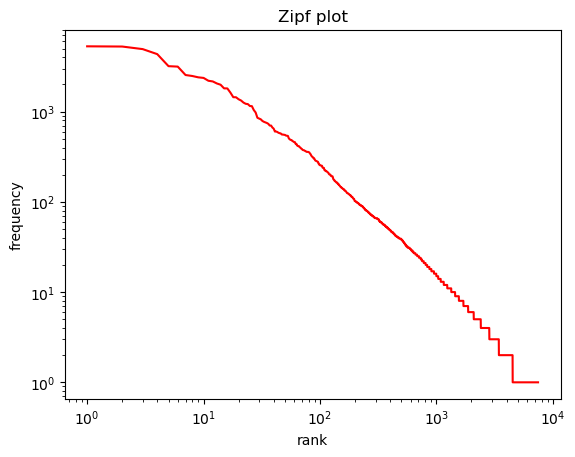

In [ ]:
# teste com texto lorem ipsum
if __name__ == '__main__':
    word_hist = process_file('livros/livro-teste.txt', start_line=23)
    c_t = print_most_used_words(word_hist)
    plot_word_frequencies(c_t)

Código do autor:

In [83]:
import sys
import string

import matplotlib.pyplot as pyplot

In [124]:
def rank_freq(hist):
    """Returns a list of tuples where each tuple is a rank
    and the number of times the item with that rank appeared.
    """
    # sort the list of frequencies in decreasing order
    freqs = hist.values()
    # freqs.sort(reverse=True)
    sorted_freqs = sorted(hist.values(), reverse=True)

    # enumerate the ranks and frequencies 
    rf = [(r+1, f) for r, f in enumerate(sorted_freqs)]
    return rf

In [114]:
def print_ranks(hist):
    """Prints the rank vs. frequency data."""
    for r, f in rank_freq(hist):
        print (r, f)

In [115]:
def plot_ranks(hist, scale='log'):
    """Plots frequency vs. rank."""
    t = rank_freq(hist)
    rs, fs = zip(*t)

    pyplot.clf()
    pyplot.xscale(scale)
    pyplot.yscale(scale)
    pyplot.title('Zipf plot')
    pyplot.xlabel('rank')
    pyplot.ylabel('frequency')
    pyplot.plot(rs, fs, 'r-')
    pyplot.show()


In [125]:
def test(filename='livros/emma-austen.txt', flag='plot'):
    hist = process_file(filename, start_line=23)

    # either print the results or plot them
    if flag == 'print':
        print_ranks(hist)
    elif flag == 'plot':
        plot_ranks(hist)
    else:
        print('Usage: zipf.py filename [print|plot]')

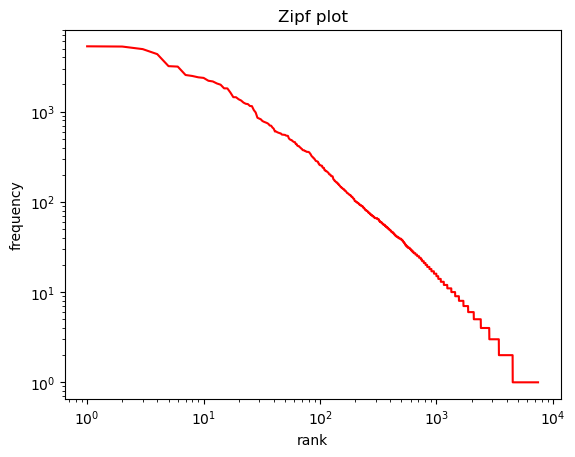

In [126]:
if __name__ == '__main__':
    test()